In [2]:
import pandas as pd
import scipy.stats as st
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.metrics import accuracy_score
from joblib import dump, load
from sklearn import tree
import math
import random
%matplotlib inline

In [16]:
# load data
df = pd.read_csv('health care diabetes.csv')
df

X = df['Glucose']
y = df['Outcome']

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [18]:
X_adjusted = []
y_adjusted = []

# X.size == y.size
# If glucose level < 54 mg/dL then you're probably dead
for i in range(0, X.size):
    if X[i] >= 54 and (y[i] == 0 or y[i] == 1):
        X_adjusted.append(X[i])
        y_adjusted.append(y[i])

768
True
762


In [44]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X_adjusted).reshape(-1, 1), y_adjusted, test_size=0.25)
print(f"X train: {X_train}\n")
print(f"X test: {X_test}\n")
print(f"y train: {y_train}\n")
print(f"y test: {y_test}\n")

model = LogisticRegression()
model.fit(X_train, y_train) # TODO: fix, why are all predictions 0
print(f"Accuracy: {model.score(X_test, y_test)}")

X train: [[128]
 [116]
 [124]
 [180]
 [ 79]
 [168]
 [100]
 [110]
 [ 88]
 [113]
 [123]
 [130]
 [148]
 [ 91]
 [129]
 [ 93]
 [146]
 [ 90]
 [151]
 [ 89]
 [116]
 [180]
 [100]
 [102]
 [ 94]
 [162]
 [106]
 [139]
 [119]
 [103]
 [152]
 [ 96]
 [134]
 [146]
 [101]
 [190]
 [111]
 [136]
 [142]
 [109]
 [ 74]
 [ 57]
 [106]
 [ 75]
 [182]
 [128]
 [108]
 [113]
 [133]
 [184]
 [119]
 [120]
 [149]
 [103]
 [144]
 [196]
 [119]
 [ 84]
 [109]
 [122]
 [160]
 [111]
 [ 81]
 [ 74]
 [136]
 [162]
 [ 81]
 [145]
 [ 99]
 [125]
 [ 96]
 [ 67]
 [109]
 [128]
 [111]
 [ 62]
 [122]
 [125]
 [120]
 [118]
 [ 84]
 [102]
 [104]
 [125]
 [109]
 [ 97]
 [137]
 [128]
 [186]
 [155]
 [ 99]
 [ 88]
 [127]
 [124]
 [121]
 [168]
 [173]
 [127]
 [143]
 [ 87]
 [117]
 [128]
 [ 83]
 [101]
 [102]
 [128]
 [ 86]
 [ 90]
 [ 91]
 [165]
 [ 77]
 [122]
 [112]
 [163]
 [196]
 [118]
 [ 80]
 [136]
 [119]
 [ 91]
 [ 56]
 [125]
 [124]
 [105]
 [123]
 [124]
 [136]
 [101]
 [105]
 [ 82]
 [ 94]
 [139]
 [100]
 [154]
 [122]
 [198]
 [114]
 [124]
 [130]
 [147]
 [107]
 [ 9

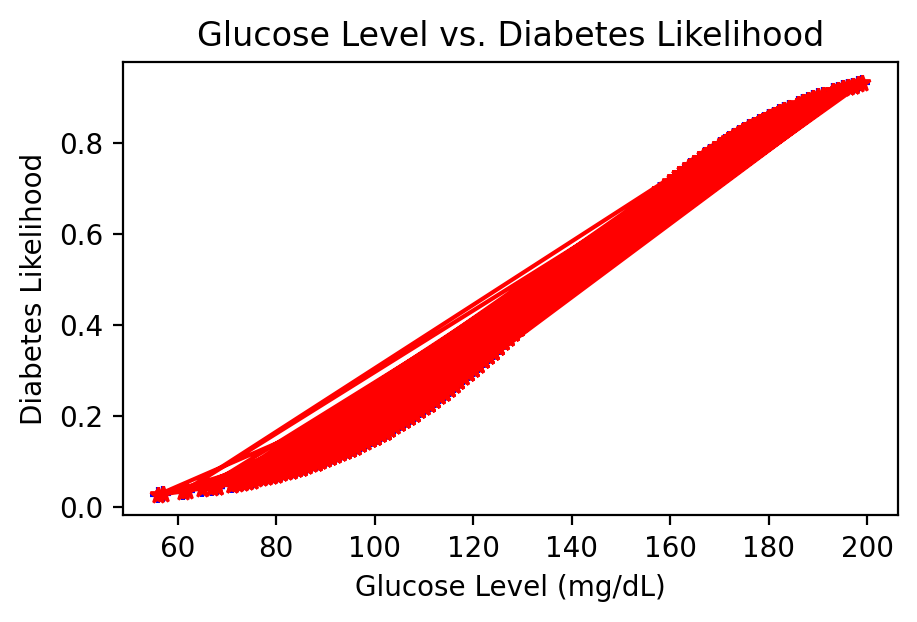

In [54]:
plt.figure(figsize=(5, 3), dpi=200)
plt.scatter(X_train, model.predict_proba(X_train)[:,1], marker='+', color='blue')
plt.xlabel('Glucose Level (mg/dL)')
plt.ylabel('Diabetes Likelihood')
plt.title('Glucose Level vs. Diabetes Likelihood')
plt.plot(X_train, model.predict_proba(X_train)[:,1], marker="*",color='red')
plt.show()

In [25]:
model.predict(X_test)

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [55]:
def sigmoid_function(x, m, b):
    return 1/(1 + math.exp(-1 * (m * x + b)))
              
# optimize model using stochastic gradient descent

clusters = [] # stores x values of data
m_init = 1
b_init = 0
learning_rate = 0.01 # default
points = []
    
def stochastic_gradient_descent(x, m, b):
    cluster_points()
    random_cluster_points()
    m_new = m_init
    b_new = b_init
    for point in points:
        y = sigmoid_function(point, m_new, b_new)
        
        adjusted_m = derivative_m(point, y, m_new, b_new)
        adjusted_b = derivative_b(point, y, m_new, b_new)
        
        m_init = m_new - adjusted_m * learning_rate
        b_init = b_new - adjusted_b * learning_rate
        

def cluster_points():
    # increment by some x and use a circle with radius x/2 to capture points
    increment = 10 # diameter of circle
    start = min(X_adjusted)
    end = max(X_adjusted)
    # (x - h)^2 + (y - k)^2 <= r^2
    radius = increment/2
    X_center = increment/2
    y_center = sigmoid_function(X_center, m_init, b_init)
    
    for i in range(start, end, increment):
        temp = []
        for j in range(start, end):
            if ((X_clean[j] - X_center)**2 + (y_clean[j] - y_center)**2) <= (radius)**2:
                temp.append(X_adjusted[j])
        clusters.append(temp)
        X_center = X_center + increment
        y_center = sigmoid_function(X_center, m_init, b_init)
        
        
    
def random_cluster_points():
    for cluster in clusters:
        i = random.randint(0, len(cluster))
        points.append(cluster[i])

# partial derivative of loss function with respect to slope
def derivative_m(x, y, m, b):
    return (-2*x)*(y-(b+m*x))
    
    
# partial derivative of loss function with respect to y-intercept
def derivative_b(x, y, m, b):
    return -2*(y-(b+m*x))

In [48]:
model = dtc()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dump(model, 'CHD.joblib')
model = load('CHD.joblib')